## Part 1 - Understanding your data and question

Lok at the question and determine what data you will need to store in your database in order to answer the questions. Start to thin about your DB schema. What tables will you want to create and what columns will you ahve for those tables. 

Look at the API documentation, and determine what fields of the API response you will match up with the columns you want in your DB tables. 


https://www.yelp.com/developers/documentation/v3/get_started

In [19]:
# import all necessary libraries
import requests
import json
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
## Create new SQL database
conn = sqlite3.connect('yelp_spa.db')
cur = conn.cursor()

conn.commit()

In [21]:
# Create SQL table for the businesses 
cur.execute("""CREATE TABLE business (
                                id TEXT PRIMARY KEY NOT NULL,
                                name TEXT,
                                is_closed NUMERIC,
                                review_count INTEGER,
                                category_1 TEXT,
                                category_2 TEXT,
                                rating INTEGER, 
                                price TEXT,
                                area TEXT,
                                location_city TEXT,
                                location_zipcode INTEGER)          
            """)
conn.commit()

In [22]:
# Create SQL table for the reviews
cur.execute("""CREATE TABLE reviews (
                                id TEXT PRIMARY KEY,
                                text TEXT,
                                rating NUMERIC,
                                time_created NUMERIC,
                                business_id TEXT  
                               )          
            """) 

conn.commit()

In [23]:
from  keys  import  client_id, api_key

In [24]:
# assign business API url to a variable
url =  'https://api.yelp.com/v3/businesses/search' 

In [25]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

In [26]:
# what type of business do you want to search
term = 'spa' 

#where do you want to perform this search
location = 'Miami,FL'

# what is your other parameter you want to search against
radius = 40000

In [27]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [28]:
# from  functions  import  yelp_call, parse_results, db_insert # <-- functions.py doesn't work as expected

ModuleNotFoundError: No module named 'functions.py'; 'functions' is not a package

In [12]:
# need to remove after functions.py works

def yelp_call(url, url_params, api_key):
    # code to make the yelp call for businesses
    response = requests.get(url, headers=headers, params=url_params)
    data = json.loads(response.text)
    return data

In [13]:
# need to remove after functions.py works

def parse_results(results, location):
    # code to parse the result to make them easier to insert into the SQL business database
    parsed_results = []
    biz_ID_list = []

    for business in results['businesses']:
        for item in ['is_closed', 'review_count', 'categories', 'rating', 'price']:
            if item == 'categories':
                if len(business[item]) == 0:
                    business[item] = []
                    business[item].append({'alias': '', 'title': np.nan})
                    business[item].append({'alias': '', 'title': np.nan})
                elif len(business[item]) == 1:
                    business[item].append({'alias': '', 'title': np.nan})
            if item not in business:
                business[item] = np.nan
            else:
                business[item]

        biz_tuple = (business['id'], 
                business['name'] , 
                business['is_closed'], 
                business['review_count'],
                business['categories'][0]['title'], 
                business['categories'][1]['title'],
                business ['rating'], 
                business ['price'],
                location,
                business['location']['city'],
                business['location']['zip_code'])
        biz_ID_list.append(business['id'])
        parsed_results.append(biz_tuple)
    return parsed_results

In [14]:
# need to remove after functions.py works

def db_insert(cnx, cursor, parsed_results):
    # code to insert and commit the results to the SQL business database
    add_business = ("""INSERT INTO business 
              (id, name, is_closed, review_count, category_1, category_2, rating, price, area,
                   location_city, location_zipcode) 
              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""")
    cursor.executemany(add_business, parsed_results)
    cnx.commit()

In [15]:
# create a variable  to keep track of which result you are in. 
current_offset = 0

#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results, location)
    
    # use your function to insert your parsed results into the db
    db_insert(conn, cur, parsed_results)
    print(current_offset) # to check that the code works
    #increment the counter by 50 to move on to the next results
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [47]:
Miami_total_spa_count = results['total']
Miami_total_spa_count

2800

In [16]:
# change location to perform the second search
location = 'Orlando,FL'

In [17]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [18]:
# create a variable  to keep track of which result you are in. 
current_offset = 0

#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results, location)
    
    # use your function to insert your parsed results into the db
    db_insert(conn, cur, parsed_results)
    print(current_offset) # to check that the code works
    #increment the counter by 50 to move on to the next results
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [45]:
Orlando_total_spa_count = results['total']
Orlando_total_spa_count

1700

In [32]:
# create a list of all business IDs in the business DB
query = ("SELECT id FROM business ")
cur.execute(query)
business_ID_list = cur.fetchall()

In [38]:
# from  functions  import  yelp_review_call, parse_review_results, db_review_insert
# <-- functions.py doesn't work as expected

ImportError: cannot import name 'yelp_review_call' from 'functions' (/Users/dariga_kokenova/Documents_comp/Flatiron_projects/Yelp_API_project/functions.py)

In [39]:
# need to remove after functions.py works

def yelp_review_call(business_id):
    # your code to make the yelp call
    response = requests.get('https://api.yelp.com/v3/businesses/{}/reviews'.format(business_id), headers=headers)
    review_data = json.loads(response.text)
    return review_data

In [48]:
# need to remove after functions.py works

def parse_review_results(review_results, business_id):
    # code to parse the review results to make them easier to insert into the SQL reviews database
    parsed_results = []
    
    if 'error' in review_results:
        if review_results['error']['code'] == 'BUSINESS_UNAVAILABLE': # to account for businesses without reviews
            return None
    else:
        for review in review_results['reviews']:
            for item in ['text', 'rating', 'time_created']:
                if item not in review:
                    review[item] = np.nan
                else:
                    review[item]

            review_tuple = (review['id'], 
                    review['text'] , 
                    review['rating'], 
                    review['time_created'],
                    business_id)
            parsed_results.append(review_tuple)
        return parsed_results

In [49]:
# need to remove after functions.py works

def db_review_insert(cnx, cursor, parsed_results):
    # code to insert and commit the results to the SQL review database
    add_review = ("""INSERT INTO reviews 
              (id, text, rating, time_created, business_id) 
              VALUES (?, ?, ?, ?, ?)""")
    cursor.executemany(add_review, parsed_results)
    cnx.commit()

In [50]:
# create a variable  to keep track of which result you are in. 
count = 0
#set up a while loop to go through all business IDs and grab the result of reviews

for biz_id in business_ID_list:
#     biz_id = str(biz_id)[2:-3]
    biz_id = biz_id[0]
#     print(biz_id)
    #make your API call with the new offset number
    review_results = yelp_review_call(biz_id)
    
    #after you get your results you can now use your function to parse those results
    parsed_review_results = parse_review_results(review_results, biz_id)
    
    # use your function to insert your parsed results into the db
    if parsed_review_results == None:
        pass
#         print(count)
#         continue
    else:
        db_review_insert(conn, cur, parsed_review_results)
    #increment the counter by 50 to move on to the next results
#     print(count)
    count += 1
    if count % 100 == 0: # to check that the code works
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [51]:
cur.execute("SELECT * from business")
business_data = pd.DataFrame(cur.fetchall())
business_data.columns = [x[0] for x in cur.description]
business_data

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
0,nNLKoINrGTcwPYznO0afNA,Tao Spa Miami,0,215,Massage,Skin Care,4.5,$$,"Miami,FL",Miami Beach,33139
1,HrTHjKD-zbS2GvbDCeS54Q,Biltmore Spa,0,101,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Coral Gables,33134
2,ImwHmojjWspwyItzRZxd7A,The Spa at Mandarin Oriental,0,73,Day Spas,Massage,4.0,$$$$,"Miami,FL",Miami,33131
3,N2Rex8AJS2MG58goE-bXLg,Exhale Miami,0,125,Day Spas,None,4.0,$$$,"Miami,FL",Miami,33131
4,WcURjIVEINE-Y24WLpezAA,Lapis Spa,0,296,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Miami Beach,33140
...,...,...,...,...,...,...,...,...,...,...,...
1995,6OzuKKB0fv37oO-IxUKOlw,Salon 88,0,7,Hair Salons,Nail Salons,4.0,$$,"Orlando,FL",Winter Park,32789
1996,sIKy5oNSEGOXPgynLRoyBA,Healthier Living and Massage,0,1,Massage Therapy,Reflexology,5.0,None,"Orlando,FL",Maitland,32751
1997,Jq4WxKr3wulYQYfDMmlSJw,"Edward J Gross, MD",0,25,Cosmetic Surgeons,Skin Care,3.5,$$$,"Orlando,FL",Lake Mary,32746
1998,T2UcKkHLDcBGCZhkXYCDHA,Sassy Nail,0,8,Nail Salons,None,4.0,$,"Orlando,FL",Longwood,32779


In [57]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   object 
 1   name              2000 non-null   object 
 2   is_closed         2000 non-null   int64  
 3   review_count      2000 non-null   int64  
 4   category_1        2000 non-null   object 
 5   category_2        1500 non-null   object 
 6   rating            2000 non-null   float64
 7   price             1060 non-null   object 
 8   area              2000 non-null   object 
 9   location_city     2000 non-null   object 
 10  location_zipcode  2000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 172.0+ KB


In [52]:
business_data['is_closed'].value_counts()  # to check if any businesses have closed

0    2000
Name: is_closed, dtype: int64

In [53]:
cur.execute("SELECT * from reviews")
reviews_data = pd.DataFrame(cur.fetchall())
reviews_data.columns = [x[0] for x in cur.description]
reviews_data

,id,text,rating,time_created,business_id
0,CymB81wlWv0Z-RS3kPaMfA,I was feeling down and felt I had some type of...,5,2020-11-15 09:48:51,-4CWLN_ZIWC3dfIWbFHisw
1,wy3NtldU5z0mPVlELFu_XQ,I honestly don't have anything bad to say abou...,5,2020-11-01 12:00:37,-51v1nSIQvqbYfILt8BSKw
2,pmSDNCahkAjoicOSyF6weg,Update - made an appointment for 330. Checked ...,1,2020-12-30 12:30:20,-51v1nSIQvqbYfILt8BSKw
3,UhXhG7GTUH8S-66cbPSabQ,First time visiting this place and it was amaz...,5,2021-01-01 14:02:15,-51v1nSIQvqbYfILt8BSKw
4,yeKGoi3UKVSV6FY3x_QLjw,My daughter went to a party here and loved it ...,5,2018-03-24 14:09:14,-6WOo-7oDbq9UMgNQmo4BQ
...,...,...,...,...,...
5148,d6xLZUGnvNTegiQJa71jfw,After looking for a location where I can regul...,5,2017-02-10 16:03:11,zwLEQ5nET8c1BDIHHOQ5YQ
5149,ExYUxbvcVi-yw_cKSfR5eQ,"""First off, $24 for a one-hour massage is unbe...",5,2015-09-18 15:55:40,zwLEQ5nET8c1BDIHHOQ5YQ
5150,6ebVJal8wW-PHm7dXJiLWw,My experience with Miami acupuncture and class...,5,2019-04-07 13:01:18,zygj7nRfUhVvMpmaET-TaQ
5151,SPi-gRENbKrkZU3-_VdW4w,Although I was skeptical and an emotional cli...,5,2018-05-17 12:52:19,zygj7nRfUhVvMpmaET-TaQ


In [54]:
#  set up visualization styles
sns.set_style('darkgrid')
sns.set_context('talk')

In [55]:
# to count how many businesses in 'area' == 'Miami,FL' have no price information
business_data[business_data['area'] == 'Miami,FL']['price'].isna().sum()

470

In [59]:
business_data[business_data['area'] == 'Miami,FL'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   name              1000 non-null   object 
 2   is_closed         1000 non-null   int64  
 3   review_count      1000 non-null   int64  
 4   category_1        1000 non-null   object 
 5   category_2        784 non-null    object 
 6   rating            1000 non-null   float64
 7   price             530 non-null    object 
 8   area              1000 non-null   object 
 9   location_city     1000 non-null   object 
 10  location_zipcode  1000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 93.8+ KB


In [56]:
# to count how many businesses in 'area' == 'Orlando,FL' have no price information
business_data[business_data['area'] == 'Orlando,FL']['price'].isna().sum()

470

In [60]:
business_data[business_data['area'] == 'Orlando,FL'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1000 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   name              1000 non-null   object 
 2   is_closed         1000 non-null   int64  
 3   review_count      1000 non-null   int64  
 4   category_1        1000 non-null   object 
 5   category_2        716 non-null    object 
 6   rating            1000 non-null   float64
 7   price             530 non-null    object 
 8   area              1000 non-null   object 
 9   location_city     1000 non-null   object 
 10  location_zipcode  1000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 93.8+ KB


In [61]:
# create a column 'price_text', because values in column 'price' are not recognized in plots
business_data['price_text'] = business_data['price'].map({'$':'1_dollar','$$':'2_dollar',
                                                         '$$$':'3_dollar', '$$$$':'4_dollar'})

In [62]:
# create a column 'price_tier': low_tier is $, mid_tier is $$, high_tier is $$$ and $$$$
business_data['price_tier'] = business_data['price'].map({'$':'low_tier','$$':'mid_tier',
                                                         '$$$':'high_tier', '$$$$':'high_tier'})

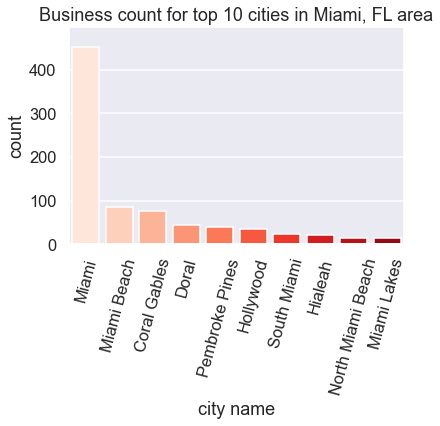

In [88]:
# top 10 cities for area == Miami,FL
g = sns.countplot(x = 'location_city', data = business_data[business_data['area'] == 'Miami,FL'],
    order = business_data[business_data['area'] == 'Miami,FL']['location_city'].value_counts().index[:10],
             palette = 'Reds', saturation = 1)
g.set_title('Business count for top 10 cities in Miami, FL area')
g.set_xlabel('city name')
g.set_ylim(0, 499)
plt.xticks(rotation = 75);

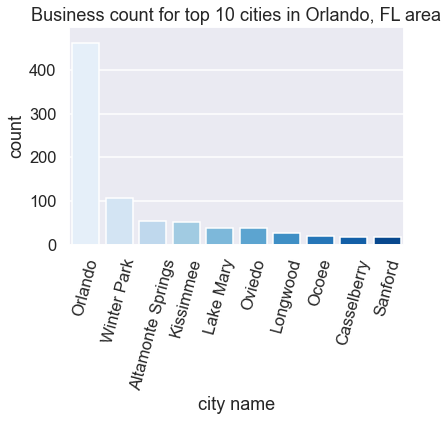

In [89]:
# top 10 cities for area == Orlando,FL
g = sns.countplot(x = 'location_city', data = business_data[business_data['area'] == 'Orlando,FL'],
    order = business_data[business_data['area'] == 'Orlando,FL']['location_city'].value_counts().index[:10],
             palette = 'Blues', saturation = 1)
g.set_title('Business count for top 10 cities in Orlando, FL area')
g.set_xlabel('city name')
g.set_ylim(0, 499)
plt.xticks(rotation = 75);

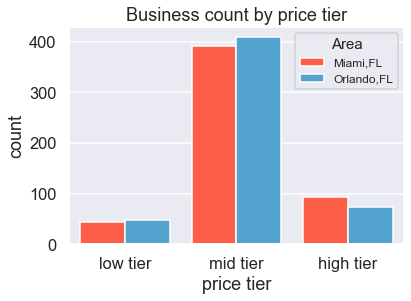

In [78]:
# break out by column price_tier
g = sns.countplot(x = 'price_tier', data = business_data, order = ['low_tier', 'mid_tier', 'high_tier'],
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1)
# excluded price = None. Miami,FL has 470 businesses without price. Orlando,FL has 470 businesses without price.
g.set_title('Business count by price tier')
g.set_xlabel('price tier')
g.set_xticklabels(['low tier', 'mid tier', 'high tier'])
g.legend(fontsize = 12, title = 'Area', title_fontsize='15');

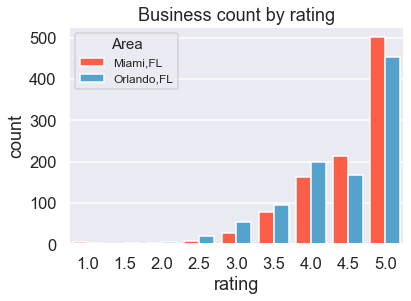

In [95]:
# break out by rating
g = sns.countplot(x = 'rating', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1)
# no rating NULL
g.set_title('Business count by rating')
g.set_xlabel('rating')
g.legend(fontsize = 12, title = 'Area', title_fontsize='15');

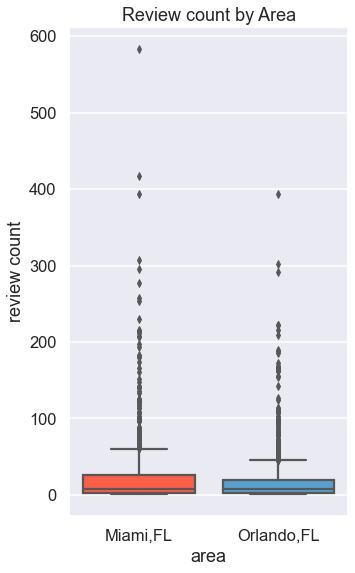

In [101]:
# review_count for all businesses in Miami and Orlando
fig, ax = plt.subplots(figsize = (5, 9))
sns.boxplot(x = 'area', y = 'review_count', data = business_data,
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax)
ax.set_title('Review count by Area')
ax.set_ylabel('review count');

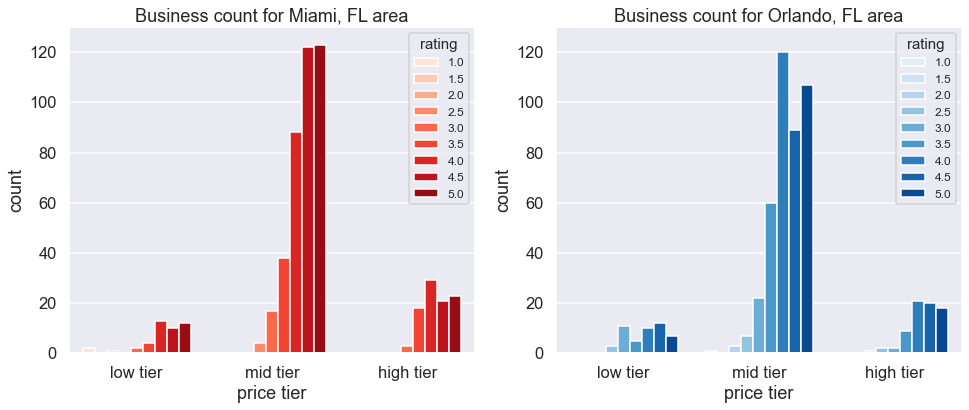

In [130]:
# break out prices by rating for Miami and Orlando
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(x = 'price_tier', data = business_data[business_data['area'] == 'Miami,FL'],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[0],
             hue = 'rating', palette = 'Reds', saturation = 1)
sns.countplot(x = 'price_tier', data = business_data[business_data['area'] == 'Orlando,FL'],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[1],
             hue = 'rating', palette = 'Blues', saturation = 1)
ax[0].set_title('Business count for Miami, FL area')
ax[0].set_xlabel('price tier')
ax[0].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[0].set_ylim(0, 130)
ax[0].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[1].set_title('Business count for Orlando, FL area')
ax[1].set_xlabel('price tier')
ax[1].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[1].set_ylim(0, 130)
ax[1].legend(fontsize = 12, title = 'rating', title_fontsize='15');

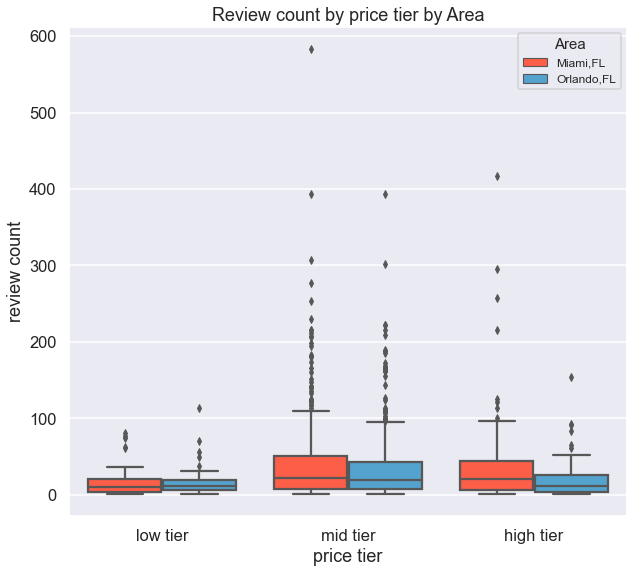

In [151]:
# review_count by price tier for all businesses in Miami and Orlando
fig, ax = plt.subplots(figsize = (10, 9))
sns.boxplot(x = 'price_tier', y = 'review_count', data = business_data, hue = 'area',
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax,
           order = ['low_tier', 'mid_tier', 'high_tier'])
ax.set_title('Review count by price tier by Area')
ax.set_xlabel('price tier')
ax.set_ylabel('review count')
ax.set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax.legend(fontsize = 12, title = 'Area', title_fontsize='15');

In [119]:
# create columns category_1_adjusted and category_2_adjusted and map 'Hair Stylists' to 'Hair Salons' and
# 'Massage Therapy' to 'Massage'
business_data['category_1_adjusted'] = business_data['category_1']
business_data['category_1_adjusted'] = business_data['category_1_adjusted'].map({'Hair Stylists':'Hair Salons',
                                'Massage Therapy':'Massage'}).fillna(business_data['category_1'])
business_data['category_2_adjusted'] = business_data['category_2']
business_data['category_2_adjusted'] = business_data['category_2_adjusted'].map({'Hair Stylists':'Hair Salons',
                                'Massage Therapy':'Massage'}).fillna(business_data['category_2'])

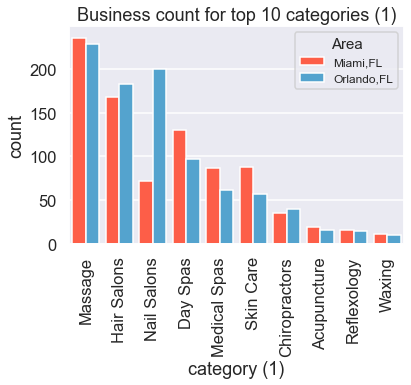

In [127]:
# top 10 break out by category_1_adjusted
g = sns.countplot(x = 'category_1_adjusted', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1,
              order = business_data['category_1_adjusted'].value_counts().index[:10])
g.set_title('Business count for top 10 categories (1)')
g.set_xlabel('category (1)')
g.set_ylim(0, 249)
g.legend(fontsize = 12, title = 'Area', title_fontsize='15')
plt.xticks(rotation = 90);

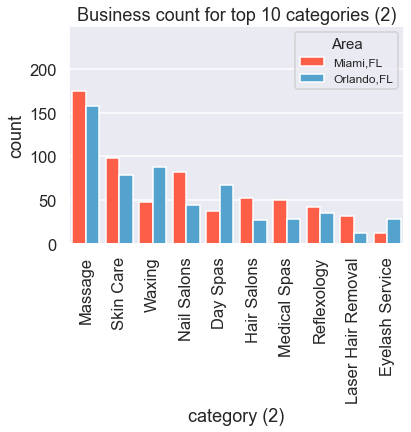

In [128]:
# top 10 break out by category_2
g = sns.countplot(x = 'category_2_adjusted', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1,
              order = business_data['category_2_adjusted'].value_counts().index[:10])
g.set_title('Business count for top 10 categories (2)')
g.set_xlabel('category (2)')
g.set_ylim(0, 249)
g.legend(fontsize = 12, title = 'Area', title_fontsize='15')
plt.xticks(rotation = 90);

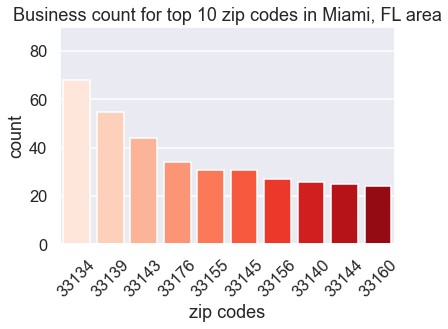

In [133]:
# top 10 zip codes for Miami, FL
g = sns.countplot(x = 'location_zipcode', data = business_data[business_data['area'] == 'Miami,FL'],
    order = business_data[business_data['area'] == 'Miami,FL']['location_zipcode'].value_counts().index[:10],
             palette = 'Reds', saturation = 1)
g.set_title('Business count for top 10 zip codes in Miami, FL area')
g.set_xlabel('zip codes')
g.set_ylim(0, 90)
plt.xticks(rotation = 45);

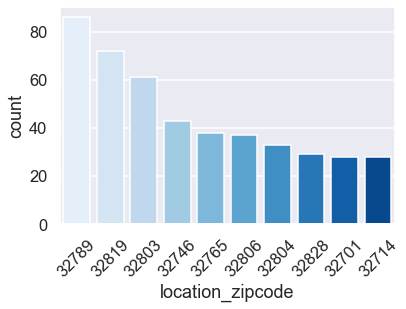

In [134]:
# top 10 zip codes for 'area' = Orlando, FL
sns.countplot(x = 'location_zipcode', data = business_data[business_data['area'] == 'Orlando,FL'],
    order = business_data[business_data['area'] == 'Orlando,FL']['location_zipcode'].value_counts().index[:10],
             palette = 'Blues', saturation = 1)
g.set_title('Business count for top 10 zip codes in Miami, FL area')
g.set_xlabel('zip codes')
g.set_ylim(0, 90)
plt.xticks(rotation = 45);

In [135]:
# general statistics by county
Miami_Dade_county_population = 2716940
Miami_Dade_county_median_income = 51347
Miami_Dade_county_per_capita_income = 28224
Orange_county_population = 1393452
Orange_county_median_income = 58250
Orange_county_per_capita_income = 30456

# median income for top 5 zipcodes in Yelp's "Miami, FL" area
median33134_income = 68868
median33139_income = 53327
median33143_income = 67042
median33176_income = 72998
median33155_income = 68699

# median income for top 5 zipcodes in Yelp's "Orlando, FL" area
median32789_income = 79759
median32819_income = 73088
median32803_income = 75474
median32746_income = 87581
median32765_income = 81459

In [136]:
median_income_top5zipcodes_Miami_area = (median33134_income + median33139_income +
                                            median33143_income + median33176_income +
                                           median33155_income) / 5
median_income_top5zipcodes_Orlando_area = (median32789_income + median32819_income +
                                            median32803_income + median32746_income +
                                           median32765_income) / 5

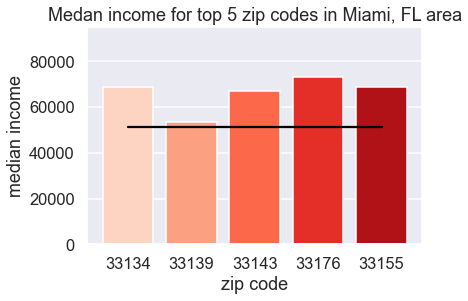

In [138]:
# income for top 5 zipcodes for Miami, FL
fig, ax = plt.subplots()
ax = sns.barplot(x = ['33134','33139', '33143', '33176', '33155'], y = [median33134_income,
                            median33139_income, median33143_income, median33176_income, median33155_income],
                 palette = 'Reds', saturation = 1)
ax = sns.lineplot(x = ['33134','33139', '33143', '33176', '33155'], 
    y = [Miami_Dade_county_median_income, Miami_Dade_county_median_income,
            Miami_Dade_county_median_income, Miami_Dade_county_median_income, Miami_Dade_county_median_income],
                  color = 'black')
ax.set_title('Medan income for top 5 zip codes in Miami, FL area')
ax.set_xlabel('zip code')
ax.set_ylabel('median income')
ax.set_ylim(0,95000);

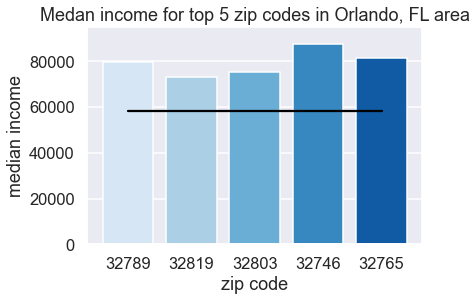

In [140]:
# income for top 5 zipcodes for Orlando, FL
fig, ax = plt.subplots()
ax = sns.barplot(x = ['32789','32819', '32803', '32746', '32765'], y = [median32789_income,
                            median32819_income, median32803_income, median32746_income, median32765_income],
                 palette = 'Blues', saturation = 1)
ax = sns.lineplot(x = ['32789','32819', '32803', '32746', '32765'], 
    y = [Orange_county_median_income, Orange_county_median_income,
            Orange_county_median_income, Orange_county_median_income, Orange_county_median_income],
                  color = 'black')
ax.set_title('Medan income for top 5 zip codes in Orlando, FL area')
ax.set_xlabel('zip code')
ax.set_ylabel('median income')
ax.set_ylim(0,95000);

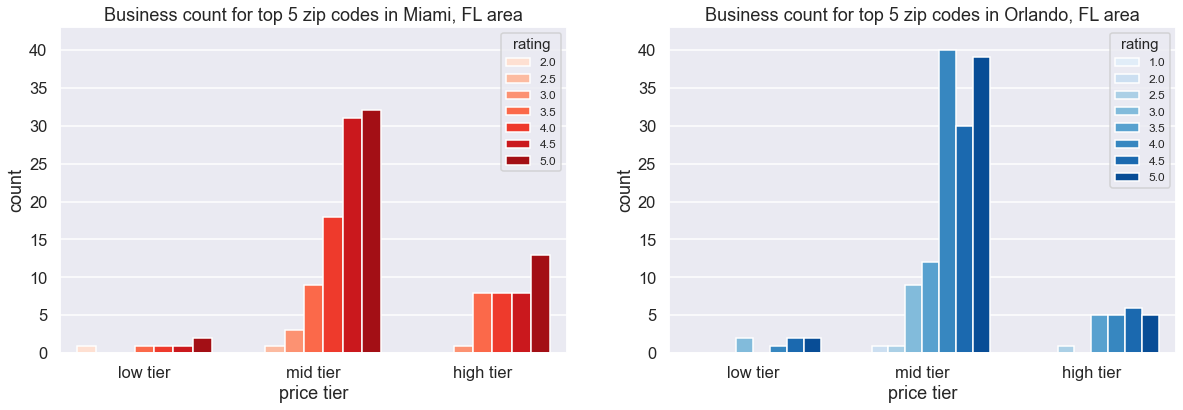

In [144]:
# break out prices by rating for top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.countplot(x = 'price_tier', data = business_data[business_data['location_zipcode'].isin([33134,
                                                                        33139, 33143, 33176, 33155])],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[0],
             hue = 'rating', palette = 'Reds', saturation = 1)
sns.countplot(x = 'price_tier', data = business_data[business_data['location_zipcode'].isin([32789,
                                                                        32819, 32803, 32746, 32765])],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[1],
             hue = 'rating', palette = 'Blues', saturation = 1)
ax[0].set_title('Business count for top 5 zip codes in Miami, FL area')
ax[0].set_xlabel('price tier')
ax[0].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[0].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[0].set_ylim(0, 43)
ax[1].set_title('Business count for top 5 zip codes in Orlando, FL area')
ax[1].set_xlabel('price tier')
ax[1].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[1].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[1].set_ylim(0, 43);

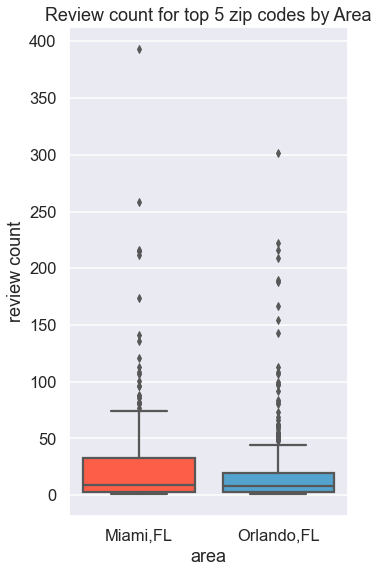

In [147]:
# review_count for businesses in top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(figsize = (5, 9))
sns.boxplot(x = 'area', y = 'review_count', data = business_data[business_data['location_zipcode'].isin([33134,
            33139, 33143, 33176, 33155, 32789, 32819, 32803, 32746, 32765])],
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax)
ax.set_title('Review count for top 5 zip codes by Area')
ax.set_ylabel('review count');

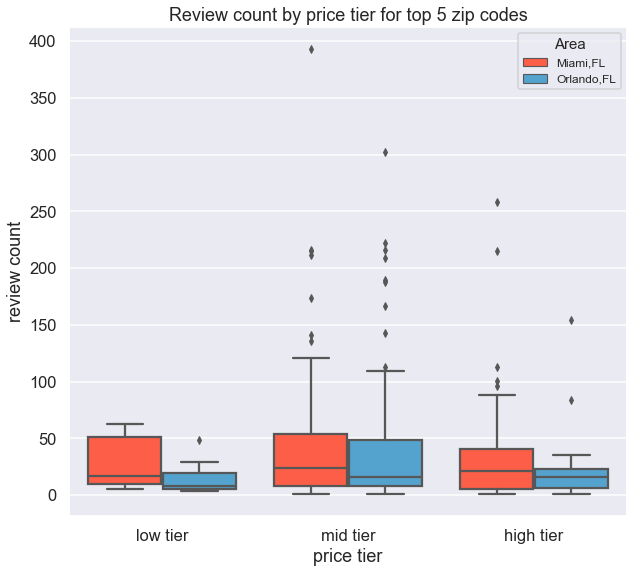

In [154]:
# review_count by price_tier for businesses in top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(figsize = (10, 9))
sns.boxplot(x = 'price_tier', y = 'review_count', data = business_data[business_data['location_zipcode'].isin([33134,
            33139, 33143, 33176, 33155, 32789, 32819, 32803, 32746, 32765])], hue = 'area',
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax,
           order = ['low_tier', 'mid_tier', 'high_tier'])
ax.set_title('Review count by price tier for top 5 zip codes')
ax.set_xlabel('price tier')
ax.set_ylabel('review count')
ax.set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax.legend(fontsize = 12, title = 'Area', title_fontsize='15');

## Part 2 - Set up the DB

Now that you are familiar with the data, create your SQL queries to create the DB and the appropriate tables. 

### Foriegn Keys

For this project you will have two tables that you need to link using a foreign key. Below is some information about how to create a foriegn key.  

https://www.sqlitetutorial.net/sqlite-foreign-key/


### Using DB:
    
For this lab, you can either store the data on one DB or put in on both of the partners DBs. If you decide to put it on one DB, you want to make sure both partners have access to it.  To do this you want to add a user to your DB.  

[how to add a new user](https://howchoo.com/g/mtm3zdq2nzv/how-to-add-a-mysql-user-and-grant-privileges)

## Part 3 - Create ETL pipeline for the business data from the API

Now that you know what data you need from the API, you want to write code that will execute a api call, parse those results and then insert the results into the DB.  

It is helpful to break this up into three different functions (*api call, parse results, and insert into DB*) and then you can write a function/script that pull the other three functions together. 

Let's first do this for the Business endpoint.

- Write a function to make a call to the yelp API

- Write a function to parse the API response so that you can easily insert the data in to the DB

- Write a function to take your parsed data and insert it into the DB

- Write a script that combines the three functions above into a single process.

## Part 4 -  Create ETL pipeline for the restaurant review data from the API

You've done this for the Businesses, now you need to do this for reviews. You will follow the same process, but your functions will be specific to reviews.

- Write a SQL query to pull back all of the business ids. You will need these ids to pull back the reviews for each restaurant

- Write a function that takes a business id and makes a call to the API for reivews


- Write a function to parse out the relevant information from the reviews

- Write a function to insert the parsed data into the reviews table

- Combine the functions above into a single script  

## Part 5 -  Write SQL queries that will answer the questions posed. 

Now that your data is in the DB, you can answer the questions. Write SQL querires that will answer the questions. **Do not use Pandas for this part of the project.**

Which are the 5 most reviewed businesses?
What is the highest rating recieved in your data set and how many businesses have that rating?
What percentage of businesses have a rating greater than or 4.5?
What percentage of businesses have a rating less than 3?
What is the average rating of businesses that have a price label of one dollar sign? Two dollar signs? Three dollar signs?
Return the text of the reviews for the most reviewed business.
Return the name of the business with the most recent review.
Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews.
Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews.

## Part 6 - Pull in relevant data into your python environment and analysis it using descriptive statistics.  This can be don either using Pandas or solely Python code.


## Part 7 - Create Data visualizations using Matplotlib or Seaborn

# Reference help

###  Pagination

Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. 

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and APIs can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

***Below is sample code that you can use to help you deal with the pagination parameter and bring all of the functions together.***


***Also, something might cause your code to break while it is running. You don't want to constantly repull the same data when this happens, so you should insert the data into the database as you call and parse it, not after you have all of the data***
